In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats


100% 812M/812M [00:28<00:00, 30.3MB/s]
100% 812M/812M [00:28<00:00, 29.7MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
 # extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.9647.jpg', 'cat.6451.jpg', 'cat.586.jpg', 'dog.3129.jpg', 'dog.7448.jpg', 'cat.11094.jpg', 'cat.10431.jpg', 'dog.1721.jpg', 'cat.2897.jpg', 'dog.6071.jpg', 'dog.3669.jpg', 'dog.2237.jpg', 'cat.7724.jpg', 'dog.1000.jpg', 'dog.7590.jpg', 'cat.2013.jpg', 'cat.2470.jpg', 'cat.1774.jpg', 'cat.9240.jpg', 'cat.9526.jpg', 'cat.4439.jpg', 'cat.3078.jpg', 'dog.4825.jpg', 'cat.7347.jpg', 'cat.6942.jpg', 'cat.106.jpg', 'cat.4473.jpg', 'cat.6953.jpg', 'dog.3254.jpg', 'dog.3831.jpg', 'dog.7780.jpg', 'cat.3601.jpg', 'dog.5180.jpg', 'dog.6039.jpg', 'cat.11776.jpg', 'cat.3898.jpg', 'cat.7219.jpg', 'dog.190.jpg', 'dog.9020.jpg', 'dog.627.jpg', 'cat.1607.jpg', 'dog.778.jpg', 'cat.11021.jpg', 'cat.4101.jpg', 'cat.3981.jpg', 'dog.4547.jpg', 'dog.11652.jpg', 'dog.2745.jpg', 'cat.292.jpg', 'cat.12226.jpg', 'cat.1935.jpg', 'cat.9244.jpg', 'cat.3617.jpg', 'dog.3744.jpg', 'dog.4005.jpg', 'dog.3654.jpg', 'dog.1353.jpg', 'cat.15.jpg', 'dog.3764.jpg', 'dog.676.jpg', 'cat.10438.jpg', 'dog.11375.jpg', 'dog.504

Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

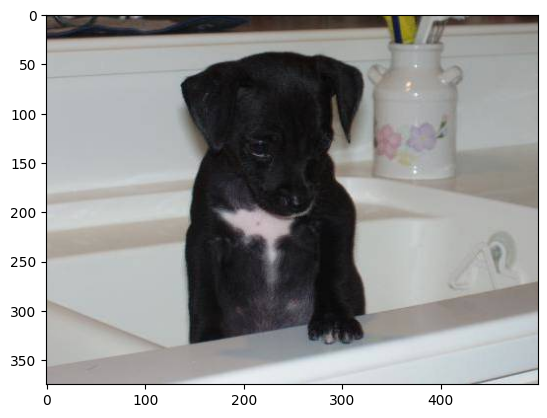

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

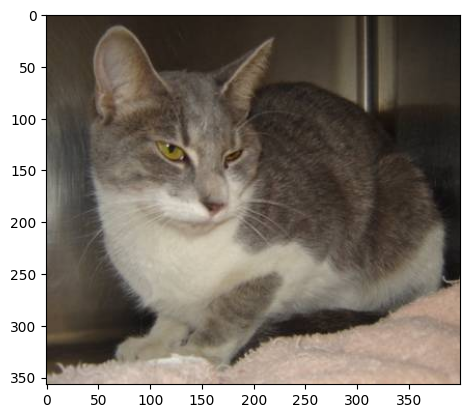

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])


dog
cat
cat
dog
dog


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

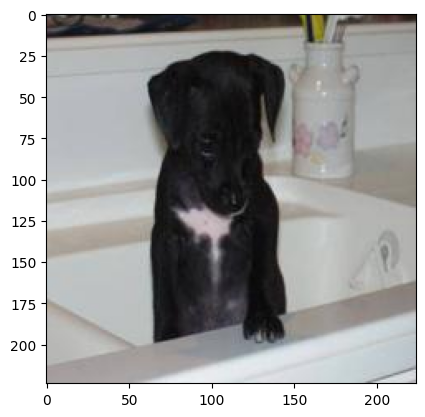

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

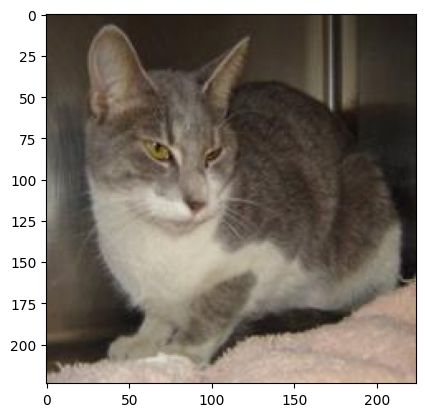

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.9647.jpg', 'cat.6451.jpg', 'cat.586.jpg', 'dog.3129.jpg', 'dog.7448.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 1, 1]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1013  987]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[128 161 157]
   [128 161 157]
   [128 161 157]
   ...
   [ 71  73  84]
   [ 69  69  81]
   [ 68  68  80]]

  [[128 161 157]
   [128 161 157]
   [128 161 157]
   ...
   [ 72  74  85]
   [ 70  72  83]
   [ 69  71  82]]

  [[126 160 159]
   [126 160 159]
   [127 161 160]
   ...
   [ 71  75  86]
   [ 70  74  85]
   [ 69  73  84]]

  ...

  [[ 58  73  82]
   [ 58  74  86]
   [ 67  81  93]
   ...
   [254 239 230]
   [253 238 229]
   [252 237 228]]

  [[ 58  74  86]
   [ 74  92 103]
   [ 95 111 124]
   ...
   [255 240 231]
   [254 239 230]
   [254 239 230]]

  [[ 85 103 114]
   [ 91 109 120]
   [ 99 115 131]
   ...
   [255 240 231]
   [255 240 231]
   [255 240 231]]]


 [[[ 24  29  28]
   [ 23  28  27]
   [ 21  26  29]
   ...
   [114  99  83]
   [113 100  84]
   [113 100  84]]

  [[ 28  33  32]
   [ 26  31  30]
   [ 21  26  29]
   ...
   [117 102  86]
   [116 103  87]
   [117 104  88]]

  [[ 30  35  34]
   [ 27  32  31]
   [ 22  27  30]
   ...
   [119 104  88]
   [118 105  89]
   [119 106

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.25882353 0.25490196 0.27058824]
   [0.36470588 0.36078431 0.37647059]
   [0.35686275 0.35686275 0.38039216]
   ...
   [0.38823529 0.37647059 0.4627451 ]
   [0.38823529 0.37647059 0.4627451 ]
   [0.38823529 0.37647059 0.4627451 ]]

  [[0.25882353 0.25490196 0.27058824]
   [0.33333333 0.32941176 0.34509804]
   [0.30588235 0.30588235 0.32941176]
   ...
   [0.39215686 0.38039216 0.46666667]
   [0.38823529 0.37647059 0.4627451 ]
   [0.38823529 0.37647059 0.4627451 ]]

  [[0.24313725 0.23921569 0.25490196]
   [0.28627451 0.28235294 0.29803922]
   [0.23921569 0.23921569 0.2627451 ]
   ...
   [0.39215686 0.38039216 0.46666667]
   [0.39215686 0.38039216 0.46666667]
   [0.38823529 0.37647059 0.4627451 ]]

  ...

  [[0.63529412 0.64313725 0.64705882]
   [0.6745098  0.68235294 0.68627451]
   [0.69411765 0.70196078 0.70588235]
   ...
   [0.71372549 0.63529412 0.65490196]
   [0.69019608 0.61176471 0.63137255]
   [0.65490196 0.57647059 0.59607843]]

  [[0.65882353 0.65882353 0.65882353]
   [0.7

Building the Neural Network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
 model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 63s 1s/step - loss: 0.2097 - acc: 0.9244
Epoch 2/5
50/50 [==============================] - 53s 1s/step - loss: 0.0795 - acc: 0.9744
Epoch 3/5
50/50 [==============================] - 52s 1s/step - loss: 0.0590 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 53s 1s/step - loss: 0.0478 - acc: 0.9875
Epoch 5/5
50/50 [==============================] - 51s 1s/step - loss: 0.0401 - acc: 0.9887


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0409 - acc: 0.9875
Test Loss = 0.040928956121206284
Test Accuracy = 0.987500011920929


Predictive **System**

Path of the image to be predicted: /content/dog2.jpg


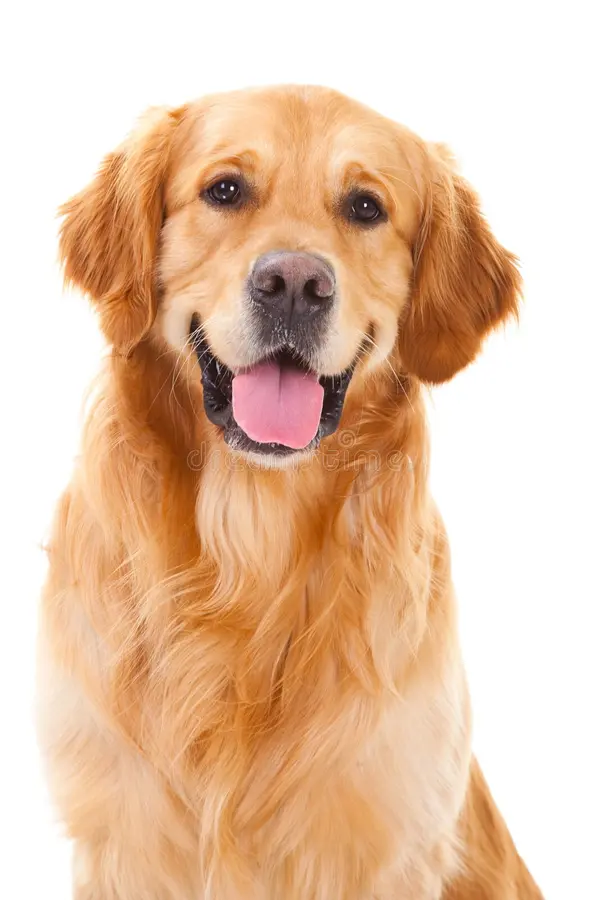

1/1 [==============================] - 0s 77ms/step
[[-3.7844777  3.2009492]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat2.jpg


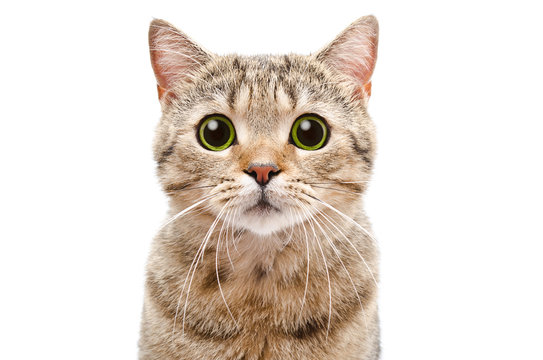

1/1 [==============================] - 0s 53ms/step
[[ 2.7055666 -1.9742539]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')